<a href="https://colab.research.google.com/github/taniokah/DL-Basic-Seminar/blob/master/dogs_vs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog and Cat Training

## 犬猫学習プログラム
本サンプルは Keras (Tensorflow) を用いて犬と猫の画像を学習します。

参考URL: https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/


# データを準備
まず、dogs-vs-cats.zip を入手します。(元データはKaggleのdogs vs cats)

https://www.dropbox.com/s/rxs0lxfauujpgih/dogs-vs-cats.zip?dl=1

In [0]:
!wget -O dogs-vs-cats.zip "https://www.dropbox.com/s/rxs0lxfauujpgih/dogs-vs-cats.zip?dl=1"

--2019-10-24 04:08:34--  https://www.dropbox.com/s/rxs0lxfauujpgih/dogs-vs-cats.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/rxs0lxfauujpgih/dogs-vs-cats.zip [following]
--2019-10-24 04:08:35--  https://www.dropbox.com/s/dl/rxs0lxfauujpgih/dogs-vs-cats.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0a4e94025d4547ed6de2202394.dl.dropboxusercontent.com/cd/0/get/ArDSl5k0xK4LWFKI__d1uDpmPp6JpNNAA_zfXN8wgt5paeFOKcsfVNPiP-_FukSkY01UqAXAyGATAxgoGI643qhTJ3SJa66Zd_XIXlCgBrBiIRjN9MqMgGKCn4Bg3FMcYcE/file?dl=1# [following]
--2019-10-24 04:08:35--  https://uc0a4e94025d4547ed6de2202394.dl.dropboxusercontent.com/cd/0/get/ArDSl5k0xK4LWFKI__d1uDpmPp6JpNNAA_zfXN8wgt5paeFOKcsfVNPiP-_FukSkY01UqAXAyGATAxgoGI643qhTJ3SJa66Zd

In [0]:
# dogs-vs-cats.zip を解凍しましょう

!unzip dogs-vs-cats.zip
!unzip train.zip
!unzip test1.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: train.zip               
  inflating: test1.zip               
Archive:  train.zip
   creating: train/
  inflating: train/cat.0.jpg         
  inflating: train/cat.1.jpg         
  inflating: train/cat.10.jpg        
  inflating: train/cat.100.jpg       
  inflating: train/cat.1000.jpg      
  inflating: train/cat.10000.jpg     
  inflating: train/cat.10001.jpg     
  inflating: train/cat.10002.jpg     
  inflating: train/cat.10003.jpg     
  inflating: train/cat.10004.jpg     
  inflating: train/cat.10005.jpg     
  inflating: train/cat.10006.jpg     
  inflating: train/cat.10007.jpg     
  inflating: train/cat.10008.jpg     
  inflating: train/cat.10009.jpg     
  inflating: train/cat.1001.jpg      
  inflating: train/cat.10010.jpg     
  inflating: train/cat.10011.jpg     
  inflating: train/cat.10012.jpg     
  inflating: train/cat.10013.jpg     
  inflating: train/cat.10014.jpg     
  inflating: train/ca

In [0]:
#ディレクトリ構造を確認してみます

!pwd;find . | sort | sed '1d;s/^\.//;s/\/\([^/]*\)$/|--\1/;s/\/[^/|]*/|  /g'

/content
|--.config
|  |--active_config
|  |--config_sentinel
|  |--configurations
|  |  |--config_default
|  |--gce
|  |--.last_survey_prompt.yaml
|  |--.last_update_check.json
|  |--logs
|  |  |--2019.10.22
|  |  |  |--15.18.30.527677.log
|  |  |  |--15.18.35.150291.log
|  |  |  |--15.18.45.704859.log
|  |  |  |--15.18.49.087613.log
|  |  |  |--15.18.50.122880.log
|  |  |--2019.10.24
|  |  |  |--02.57.19.558470.log
|  |--.metricsUUID
|--dogs-vs-cats.zip
|--open?id=1ApbyEWt9puYmLRWj1zmHJvWtolPBKeIn
|--sample_data
|  |--anscombe.json
|  |--california_housing_test.csv
|  |--california_housing_train.csv
|  |--mnist_test.csv
|  |--mnist_train_small.csv
|  |--README.md
|--sampleSubmission.csv
|--test1
|  |--10000.jpg
|  |--10001.jpg
|  |--10002.jpg
|  |--10003.jpg
|  |--10004.jpg
|  |--10005.jpg
|  |--10006.jpg
|  |--10007.jpg
|  |--10008.jpg
|  |--10009.jpg
|  |--1000.jpg
|  |--10010.jpg
|  |--10011.jpg
|  |--10012.jpg
|  |--10013.jpg
|  |--10014.jpg
|  |--10015.jpg
|  |--10016.jpg
|  |--

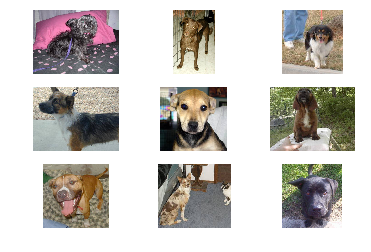

In [27]:
# 犬を表示します

# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'dog.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.axis('off')
	pyplot.imshow(image)
# show the figure
pyplot.show()

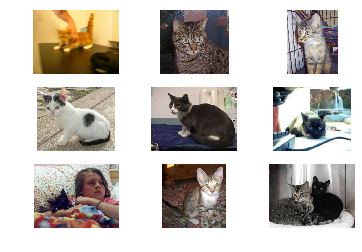

In [28]:
# 猫を表示します

# plot cat photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'cat.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.axis('off')
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [0]:
# 学習とテストのためにフォルダを分けておきます

from os import makedirs

# create directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)

In [0]:
# それぞれのフォルダにコピーします

from os import listdir
from random import random, seed
from shutil import copyfile

# seed random number generator
seed(1)

# define ratio of pictures to use for validation
val_ratio = 0.25

# copy training dataset images into subdirectories
src_directory = 'train/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('cat'):
		dst = dataset_home + dst_dir + 'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + dst_dir + 'dogs/'  + file
		copyfile(src, dst)

In [0]:
# 基本的なCNNモデルを構築する

# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
 


In [0]:
# 学習の状況をグラフ表示する関数

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['acc'], color='blue', label='train')
	pyplot.plot(history.history['val_acc'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()
 


In [0]:
# 実際に学習して精度を評価する関数

# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)

  # prepare iterators
	train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))

  # fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=5, verbose=1)

  # evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
	print('> %.3f' % (acc * 100.0))

  # learning curves
	summarize_diagnostics(history)
 


In [36]:
# プログラムを実行します

# entry point, run the test harness
run_test_harness()

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.
Epoch 1/5
293/293 [==============================] - 88s 300ms/step - loss: 0.6763 - acc: 0.5737 - val_loss: 0.6640 - val_acc: 0.5904
Epoch 2/5
293/293 [==============================] - 86s 292ms/step - loss: 0.6399 - acc: 0.6262 - val_loss: 0.6402 - val_acc: 0.6232
Epoch 3/5
293/293 [==============================] - 85s 290ms/step - loss: 0.6244 - acc: 0.6387 - val_loss: 0.6218 - val_acc: 0.6359
Epoch 4/5
293/293 [==============================] - 85s 291ms/step - loss: 0.6086 - acc: 0.6571 - val_loss: 0.6167 - val_acc: 0.6503
Epoch 5/5
99/99 [==============================] - 20s 207ms/step
> 64.303


In [0]:
# 3層のCNNモデル

# baseline model with data augmentation for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['acc'], color='blue', label='train')
	pyplot.plot(history.history['val_acc'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generators
	train_datagen = ImageDataGenerator(rescale=1.0/255.0,
		width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	test_datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = train_datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = test_datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

In [26]:
# 遷移学習


# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['acc'], color='blue', label='train')
	pyplot.plot(history.history['val_acc'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.
Epoch 1/10
293/293 [==============================] - 231s 789ms/step - loss: 0.5615 - acc: 0.9589 - val_loss: 0.4554 - val_acc: 0.9678
Epoch 2/10
293/293 [==============================] - 229s 782ms/step - loss: 0.4373 - acc: 0.9695 - val_loss: 0.3857 - val_acc: 0.9745
Epoch 3/10
293/293 [==============================] - 229s 783ms/step - loss: 0.3309 - acc: 0.9775 - val_loss: 0.4398 - val_acc: 0.9692
Epoch 4/10
293/293 [==============================] - 229s 782ms/step - loss: 0.2935 - acc: 0.9793 - val_loss: 0.3483 - val_acc: 0.9743
Epoch 5/10
293/293 [==============================] - 229s 782ms/step - loss: 0.2250 - acc: 0.9828 - val_loss: 0.3594 - val_acc: 0.9735
Epoch 6/10
293/293 [==============================] - 229s 781ms/step - loss: 0.1679 - acc: 0.9867 - val_loss: 0.2954 - val_acc: 0.9743
Epoch 7/10
293/293 [==============================] - 229s 782ms/step - loss: 0.1025 - acc: 0.9887 